# Predicting Medical Insurance Costs

Author: Necky Tran <br>
Date: 18/05/23

### Table of Contents

1. [Introduction](#Introduction)
2. [Wrangling](#Wrangling)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Linear Regression](#Linear)
5. [Summary](#Summary)

# Introduction
This notebook contains an analysis of a of a US Health Insurance Dataset. The dataset is sourced from Kaggle:
- 'https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset'

The dataset was cleaned and analyzed to generate a linear model to predict insurance costs based on Age, Sex, BMI, Number of Children, Smoker and Region.

In [2]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# read in data
df = pd.read_csv('insurance.csv')

In [4]:
# check data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data has been successfully loaded

# Wrangling
- Exploratory Data Analysis
    - Find which columns need to be converted into numeric
    - Deal with NaNs and Duplicates

In [5]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns

The [sex] and [smoker] columns can be binarized before modeling

The [region] column needs to be explored before we change it to a numerical form

In [6]:
# check unique values of the Region column
# determine the distribution of the Region Column

df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

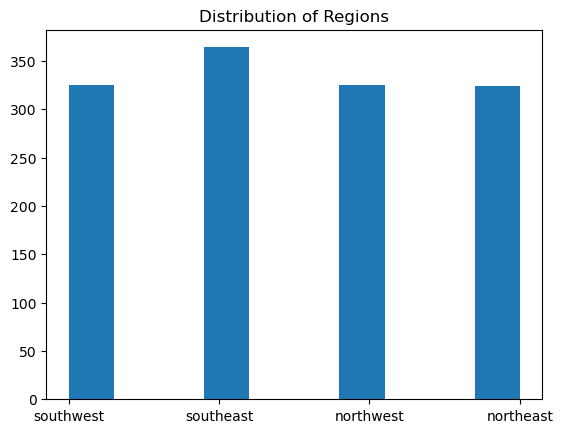

In [7]:
# plot distribution of region column
plt.figure()
plt.hist(df['region'])
plt.title('Distribution of Regions')
plt.show()

The distribution of counts is even across the regions. There is no imbalance of this categorical variable

In [8]:
# Check which columns have NaN values
#.isna() returns a dataframe of T/F for any element that is missing
#.any() tells us if there are any Trues in that column
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
# check for duplicated rows
df.duplicated().sum()

1

In [10]:
# look at duplicated row
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


There seems to be a duplicated row?<br>
This may be a duplication or 2 males with the same age/bmi/region with the same insurance costs. <br>
I will remove this, it is just 1 data point

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

### So far
- Checked Missing Values (there are non)
- Check duplicates (droped 1 observation)

### Turn categorical columns into numerical columns
- [sex] into binary
- [smoker] into binary
- [region] into dummy variables


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Turn the [sex] column into a binary column for modeling. I will create a new [male] column and designate a 1 for male and 0 for female

In [14]:
# Convert the sex column into a binary column using np.where(condition, true, false)
df['male'] = np.where(df['sex'] == 'male', 1, 0)

In [15]:
# Compare the sex column to the new 'male' column (sanity check)
# view the first 8 observations
df[['sex', 'male']].head(8)

,sex,male
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1
5,female,0
6,female,0
7,female,0


We see that our female values in [sex] are now 0 in our new [male] column. <br>
Additionally our male values in [sex] are now 1 in our new [male] column. <br>
We can do the same for the [smoker] column

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [17]:
df['smoker_yes'] = np.where(df['smoker'] == 'yes', 1, 0)
df[['smoker', 'smoker_yes']].head(5)

,smoker,smoker_yes
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0


The [smoker] column has been binarized <br>
Now we need to generate dummy columns for the [region] column

In [18]:
# concat old df with a df of dummmy columns created from the region column
df = pd.concat([df, pd.get_dummies(df['region'])], axis = 1)

In [19]:
# check new DF
df

,age,sex,bmi,children,smoker,region,charges,male,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


We can drop the old columns in our new dataframe, and keep the new numerical columns.<br>
We also need to drop one dummy variable from [region] to avoid multicolinearity and reduce redundancy

In [20]:
df = df.drop(['sex', 'smoker', 'region', 'southwest'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   children    1337 non-null   int64  
 3   charges     1337 non-null   float64
 4   male        1337 non-null   int32  
 5   smoker_yes  1337 non-null   int32  
 6   northeast   1337 non-null   uint8  
 7   northwest   1337 non-null   uint8  
 8   southeast   1337 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 66.6 KB


Every variable is now numeric, this is the final dataset before modeling

## Statistical Analysis <a name="Statistical_Analysis"></a>

- Before running a linear model we can check for correlated relationships with the [charges] column
- If there are any, run some statistical tests to see if they are significant

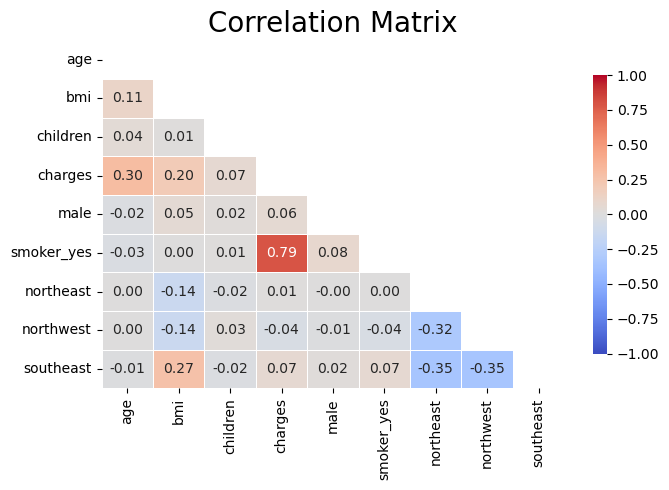

In [22]:
# Generate heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr().round(2),
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color map
            vmin=-1, vmax=1,  # Set color scale limits
            mask=np.triu(df.corr()),  # Mask upper triangle
            linewidths=0.5,  # Add linewidths between cells
            linecolor='white',  # Set linewidth color
            cbar_kws={'shrink': 0.8},  # Adjust colorbar size
            fmt=".2f")  # Format annotation values to 2 decimal places

# Set title and adjust font size
plt.title('Correlation Matrix', size=20)

# Rotate y-axis ticks for better readability
plt.yticks(rotation=0)

# Save figure to figure folder
plt.tight_layout()
plt.savefig('figures/cor_mat.png')
# Display the heatmap
plt.show()

The [smoker_yes] column is positvely correlated with the [charges] column. Being a smoker is indicative of having higher insurance costs. <br>
We can visualize the differences with a histogram and check to see if this is statistically significant with a t-test.

In [23]:
# get array of charges for smokers
smoker_yes = df[df['smoker_yes'] == 1]['charges']
# get array of charges for non-smokers
smoker_no = df[df['smoker_yes'] == 0]['charges']

In [24]:
# check the overall balance of smokers to non smokers
print(f" Smokers in the dataset = {smoker_yes.count()}") 
print(f" Non-Smokers in the dataset = {smoker_no.count()}") 

 Smokers in the dataset = 274
 Non-Smokers in the dataset = 1063


There is an overall imbalance of smokers and non-smokers in the dataset. 


In [49]:
smoker_no.mean()

8440.660306508935

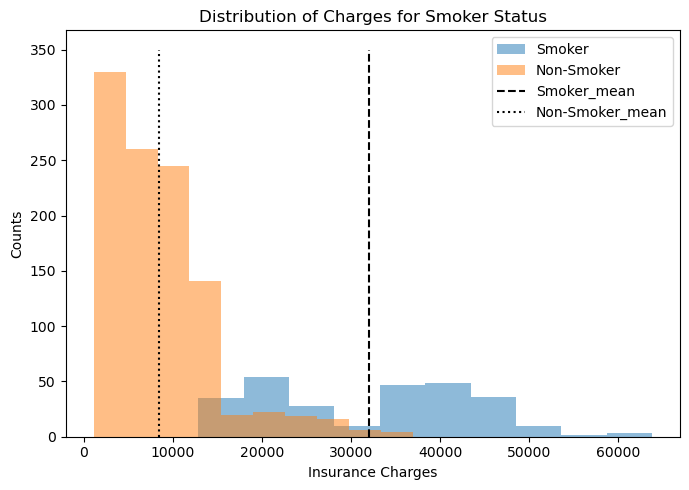

In [56]:
# histogram of two categories
plt.figure(figsize=(7, 5))
plt.hist(smoker_yes, alpha=0.5, label='Smoker')
plt.hist(smoker_no, alpha=0.5, label='Non-Smoker')
plt.vlines(x = smoker_yes.mean(), ymin=0, ymax=350, color = 'black', linestyle = '--', label='Smoker_mean')
plt.vlines(x = smoker_no.mean(), ymin=0, ymax=350, color = 'black', linestyle = ':', label='Non-Smoker_mean')
plt.title('Distribution of Charges for Smoker Status')
plt.xlabel('Insurance Charges')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/smoker_histogram.png')
plt.show()

The distributions of the two categories is visually distinct. There is only a small overlap of values and the means of both distributions are quite far apart. This is good indication that being a smoker has a significant likely-hood of increasing medical insurance costs. 

We can run a hypothesis test to see if this is truly the case. <br>
We will check with a two-sample t-test (2 tail):

$H_0$: Smoking does not increase medical insurance costs. $\mu_a \leq \mu_b$

$H_1$: Smoking increases medical insurance costs. $\mu_a > \mu_b$

Set alpha to 0.05

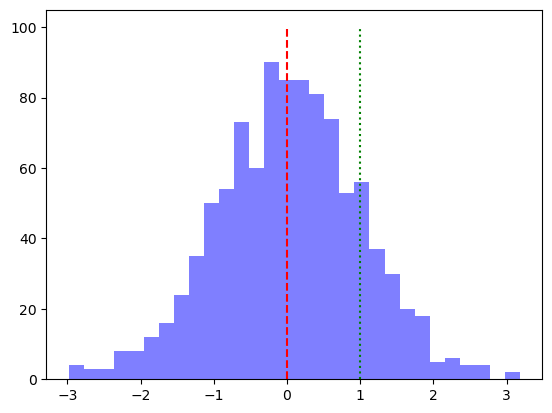

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the histogram
data = np.random.normal(loc=0, scale=1, size=1000)

# Create the histogram
plt.hist(data, bins=30, alpha=0.5, color='blue')

# Add a vertical dashed line at x = 0
plt.vlines(x=0, ymin=0, ymax=100, color='red', linestyle='--')

# Add a vertical dotted line at x = 1
plt.vlines(x=1, ymin=0, ymax=100, color='green', linestyle=':')

# Show the plot
plt.show()

In [26]:
from scipy import stats
# hypothesis test

smoker_mean = np.mean(smoker_yes) 
nonsmoker_mean = np.mean(smoker_no)
print(f'Smoker Mean: {smoker_mean}')
print(f'Non-Smoker Mean: {nonsmoker_mean}')

# we can use the built in function: ttest_ind
two_sample_test = stats.ttest_ind(smoker_yes, smoker_no, alternative = 'two-sided') 

print(two_sample_test)

Smoker Mean: 32050.23183153285
Non-Smoker Mean: 8440.660306508935
TtestResult(statistic=46.64479459840305, pvalue=1.4067220949376498e-282, df=1335.0)


The p-value for the test (7e-283) is less than our significance level (alpha = 0.05), we reject the null hypothesis. Smoking increases medical insurance costs. This indicates that the smoking variable will most likely have a very high linear coefficient in our model

## Linear Regression <a name="Linear"></a>
- Check column distributions before modeling to gain some insights
- Build a model from our data
- Analyze Residuals

In [27]:
# dependent variable = [charges]
# indepdendent variables = all numeric columns
y_linear = df['charges']

x_linear = df.select_dtypes(include=np.number)
x_linear.drop(columns = 'charges', inplace = True)

In [28]:
x_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   children    1337 non-null   int64  
 3   male        1337 non-null   int32  
 4   smoker_yes  1337 non-null   int32  
 5   northeast   1337 non-null   uint8  
 6   northwest   1337 non-null   uint8  
 7   southeast   1337 non-null   uint8  
dtypes: float64(1), int32(2), int64(2), uint8(3)
memory usage: 56.1 KB


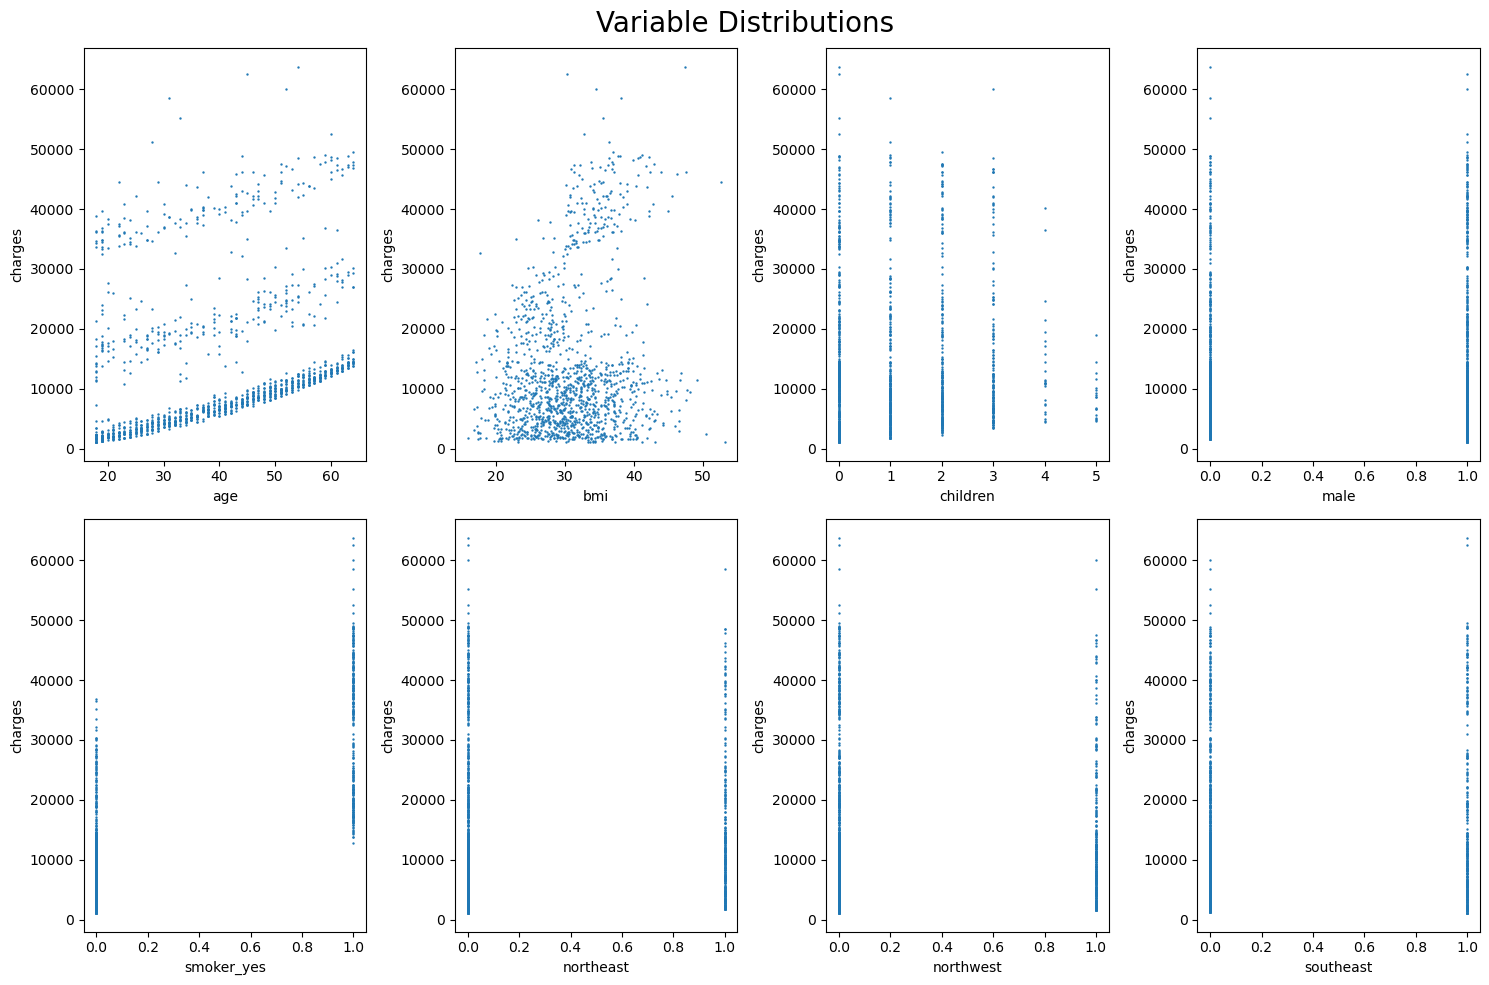

In [29]:
# check if there is a relationship between the variables

plt.subplots(2,4, figsize=(15, 10))
plt.suptitle('Variable Distributions', size=20)

for i, col in enumerate(x_linear.columns, start=1):
    plt.subplot(2,4,i)
    plt.scatter(x=x_linear[col], y = y_linear, s = 0.5)
    plt.xlabel(col)
    plt.ylabel('charges')
plt.tight_layout()
plt.show()


Charges seems to be linearly increasing with age

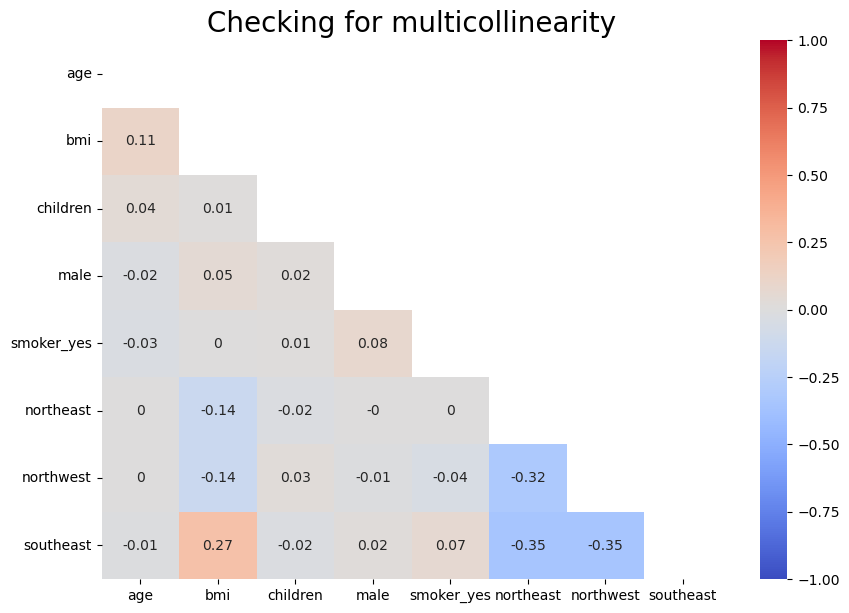

In [30]:
# check for multi-colinearity with heatmap

plt.figure(figsize=(10,7))
sns.heatmap(x_linear.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(x_linear.corr()) )
plt.title('Checking for multicollinearity', size = 20)
plt.show()

There are no variables/features that are strongly correlated with one another. We can start creating the model.

In [31]:
# import package
import statsmodels.api as sm

# add in our intercept
x_linear_constant = sm.add_constant(x_linear) 

# Instantiate Model
linear_mod = sm.OLS(y_linear, x_linear_constant)

# Fit Model
linear_mod = linear_mod.fit()

# Look at summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:05:07   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.29e+04   1021.381    -12.627      0.000   -1.49e+04   -1.09e+04
age          256.7646     11.912     21.555      0.000     233.396     280.133
bmi          339.2504     28.611     11.857      0.000     283.122     395.379
children     474.8205    137.897      3.443      0.001     204.301     745.340
male        -129.4815    333.195     -0.389      0.698    -783.128     524.165
smoker_yes  2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
northeast    960.0814    478.106      2.008      0.045      22.156    1898.007
northwest    610.8549    477.758      1.279      0.201    -326.387    1548.097
southeast    -75.1842    470.810     -0.160      0.873    -998.797     848.428
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From what we predicted, smoking has a high coefficient and is a predictor of higher insurance costs. <br>
Being male, or living in the northwest/southeast regions is not significant based on p-values. We could potentially drops these to optimize our model <br>
The model has an R-squared value of 0.751, our model explains 75% of the variablity in the data. <br>
We can check the residuals to see the vulnerabilities/weaknesses of our model

In [32]:
#extract residuals
linear_mod_resids = linear_mod.resid

#extract fitted values
linear_mod_fittedvals = linear_mod.fittedvalues

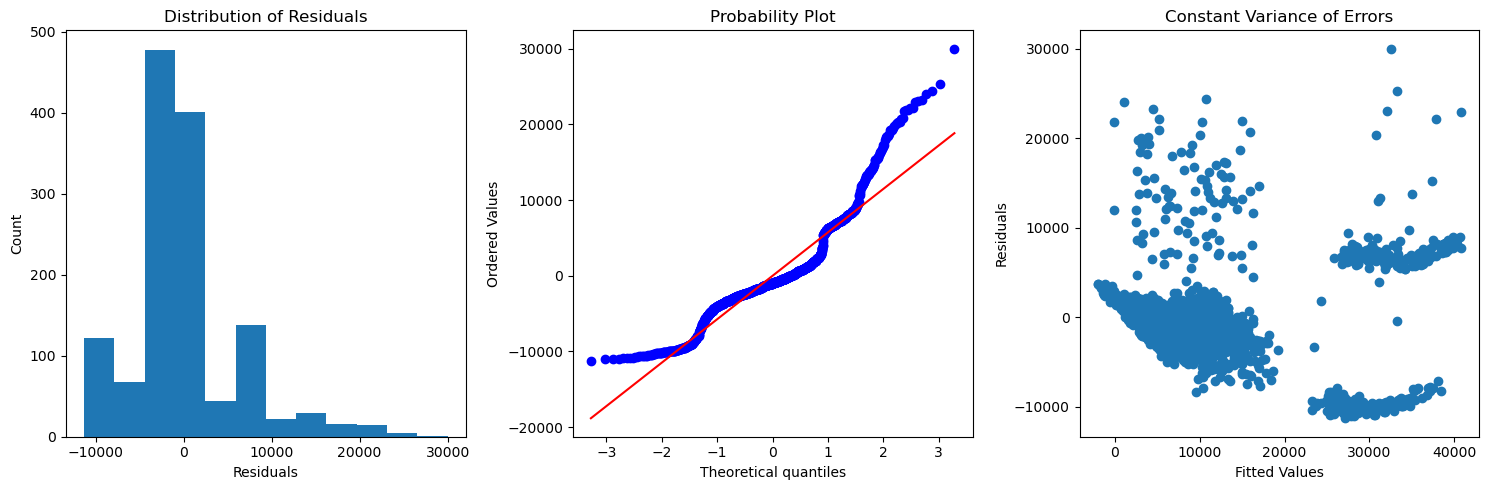

In [33]:
#extract residuals
linear_mod_resids = linear_mod.resid

#extract fitted values
linear_mod_fittedvals = linear_mod.fittedvalues

# plot distribution fo residuals, qqplot and check for homoscendasicity
plt.subplots(1,3, figsize =(15,5))

plt.subplot(1,3,1)
plt.hist(linear_mod_resids, bins = 12)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')

plt.subplot(1,3,2)
stats.probplot(linear_mod_resids, dist="norm", plot = plt)

plt.subplot(1,3,3)
plt.scatter(linear_mod_fittedvals ,  linear_mod_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Constant Variance of Errors')

plt.tight_layout()
plt.show()

The distribution of residuals seems to have a right skew. <br>
The probability plot shows deviations from the straightline pattern, indicating that the distribution has a tail. <br>
As we increase the value of X, the variance of the residuals seems to spread out more. This indicates that our prediction values are less trustworth for higher insurance costs. <br>

There may be strong outliers in the dataset which skew our model.


In [34]:
# creating a new dataframe of model coeefficients and features for a visualization
coefficients_df = pd.DataFrame({"coef": linear_mod.params,
                                "p_value": linear_mod.pvalues})
coefficients_df.reset_index(inplace=True)


coefficients_df.rename({'index':'variable'}, axis='columns', inplace=True)
coefficients_df = coefficients_df.tail(-1) # remove constant
coefficients_df = coefficients_df[coefficients_df['p_value'] <= 0.05] # remove features that are not significant
coefficients_df = coefficients_df.sort_values(by = ['coef'])


In [35]:
coefficients_df['positive'] = coefficients_df['coef'] > 0

coefficients_df

,variable,coef,p_value,positive
1,age,256.764611,1.324461e-88,True
2,bmi,339.250364,6.721670e-31,True
3,children,474.820486,5.925434e-04,True
6,northeast,960.081385,4.483556e-02,True
5,smoker_yes,23847.328844,0.000000e+00,True


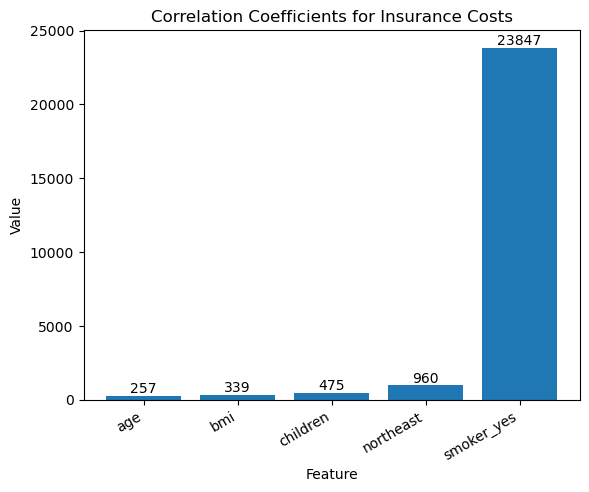

In [36]:
fig, ax = plt.subplots()
g=ax.bar(coefficients_df['variable'], round(coefficients_df['coef']))
ax.set_xlabel("Feature")
ax.set_ylabel("Value")
plt.title('Correlation Coefficients for Insurance Costs')
ax.bar_label(g) # This provides the labelling, this only available at higher version. You can do pip install -U matplotlib
plt.xticks(rotation=30, ha='right')
plt.show()

# Summary <a name="Summary"></a>

After preprocessing the initial dataframe, one duplicated observation was removed, and no missing values were identified. To facilitate modeling, the categorical features 'sex', 'smoker', and 'region' were converted into numerical values.. 

By conducting a statistical analysis with a 95% confidence level, it was determined that smoking significantly contributes to the increase in medical insurance costs compared to non-smokers. The impact of smoking on insurance costs is both substantial and statistically significant

After examining the coefficients of the linear model, it was concluded that smoking is the feature that has the greatest impact on increasing medical insurance costs.. To optimize the linear model, it is recommended to exclude non-significant features such as 'Sex'